In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# Fourier analysis of images: decomposition into cosine images

In [2]:
%pylab inline
import scipy.misc
import scipy.ndimage

Populating the interactive namespace from numpy and matplotlib


## Example 1

In [3]:
N = 256
x, y = np.meshgrid(linspace(0, N-1, N), linspace(0, N-1, N))

In [4]:
img1 = 0.5 * (cos(2 * pi * 8.0 * x / N) + 1)

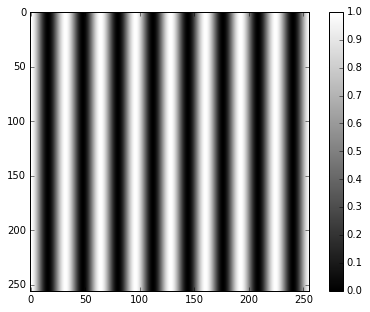

In [5]:
figure(figsize(7, 5))
plt.imshow(img1, 'gray'), plt.colorbar();

### Fourier analysis

In [6]:
fft1 = np.fft.fftshift(np.fft.fft2(img1))
magnitude_spectrum1 = 20 * np.log(1 + np.abs(fft1))

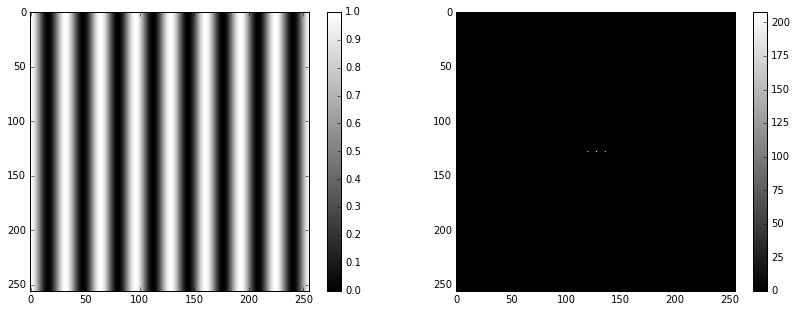

In [7]:
figure(figsize(14, 5))
plt.subplot(1, 2, 1), plt.imshow(img1, 'gray'), plt.colorbar()
plt.subplot(1, 2, 2), plt.imshow(magnitude_spectrum1, 'gray'), plt.colorbar();

## Example 2

In [8]:
img2 = 0.5 * (cos(2 * pi * 32.0 * y / N) + 1)
fft2 = np.fft.fftshift(np.fft.fft2(img2))
magnitude_spectrum2 = 20 * np.log(1 + np.abs(fft2))

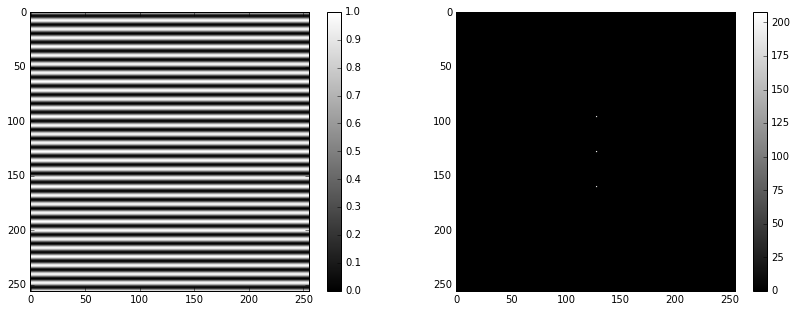

In [9]:
figure(figsize(14, 5))
plt.subplot(1, 2, 1), plt.imshow(img2, 'gray'), plt.colorbar()
plt.subplot(1, 2, 2), plt.imshow(magnitude_spectrum2, 'gray'), plt.colorbar();

### Example 3

In [10]:
img3 = 0.5 * (cos(2 * pi * 4.0 * x / N) * cos(2 * pi * 16.0 * y / N) + 1)
fft3 = np.fft.fftshift(np.fft.fft2(img3))
magnitude_spectrum3 = 20 * np.log(1 + np.abs(fft3))

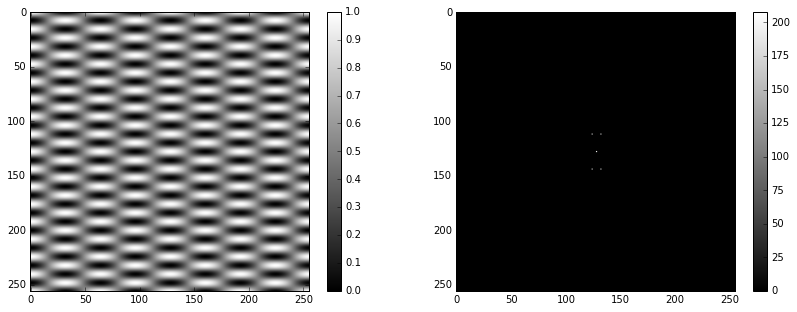

In [11]:
figure(figsize(14, 5))
plt.subplot(1, 2, 1), plt.imshow(img3, 'gray'), plt.colorbar()
plt.subplot(1, 2, 2), plt.imshow(magnitude_spectrum3, 'gray'), plt.colorbar();

## Example 4

In [12]:
img4 = 0.5 * (cos(2 * pi * 32.0 * x / N) * cos(2 * pi * 2.0 * y / N) + 1)
fft4 = np.fft.fftshift(np.fft.fft2(img4))
magnitude_spectrum4 = 20 * np.log(1 + np.abs(fft4))

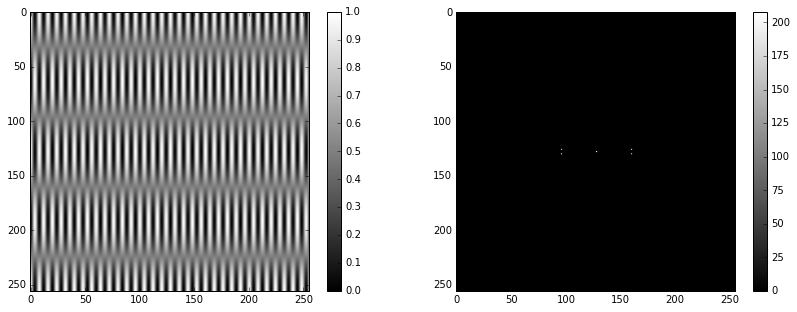

In [13]:
figure(figsize(14, 5))
plt.subplot(1, 2, 1), plt.imshow(img4, 'gray'), plt.colorbar()
plt.subplot(1, 2, 2), plt.imshow(magnitude_spectrum4, 'gray'), plt.colorbar();

## Example 5

In [14]:
N = 512
x, y = np.meshgrid(linspace(0, N-1, N), linspace(0, N-1, N))

In [15]:
img5 = 0.5 * (cos(2 * pi * 16.0 * sqrt(2) * x / N) + 1)
img5 = scipy.ndimage.interpolation.rotate(img5, 45)
img5 = img5[234:234+256, 234:234+256]
fft5 = np.fft.fftshift(np.fft.fft2(img5))
magnitude_spectrum5 = 20 * np.log(1 + np.abs(fft5))

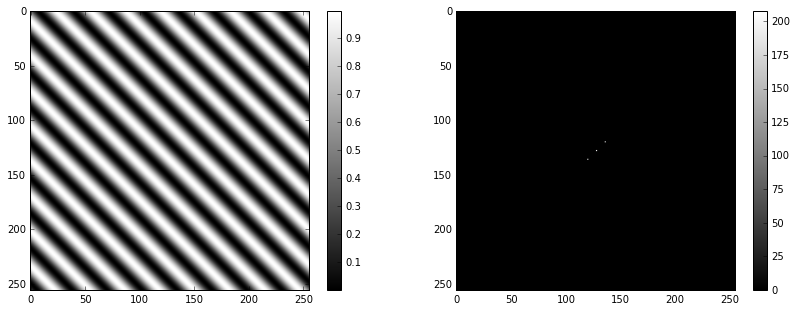

In [16]:
figure(figsize(14, 5))
plt.subplot(1, 2, 1), plt.imshow(img5, 'gray'), plt.colorbar()
plt.subplot(1, 2, 2), plt.imshow(magnitude_spectrum5, 'gray'), plt.colorbar();

## Example 6

In [17]:
img6 = 0.5 * (cos(2 * pi * 16.0 * x / N) + 1)
img6 = scipy.ndimage.interpolation.rotate(img6, 45)
img6 = img6[234:234+256, 234:234+256]
fft6 = np.fft.fftshift(np.fft.fft2(img6))
magnitude_spectrum6 = 20 * np.log(1 + np.abs(fft6))

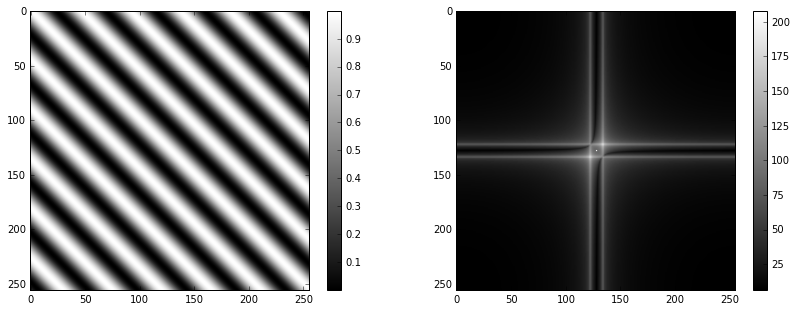

In [18]:
figure(figsize(14, 5))
plt.subplot(1, 2, 1), plt.imshow(img6, 'gray'), plt.colorbar()
plt.subplot(1, 2, 2), plt.imshow(magnitude_spectrum6, 'gray'), plt.colorbar();

### Periodic summation

In [19]:
img = zeros([512, 512])
img[0:256, 0:256] = img6
img[256:512, 0:256] = img6
img[0:256, 256:512] = img6
img[256:512, 256:512] = img6

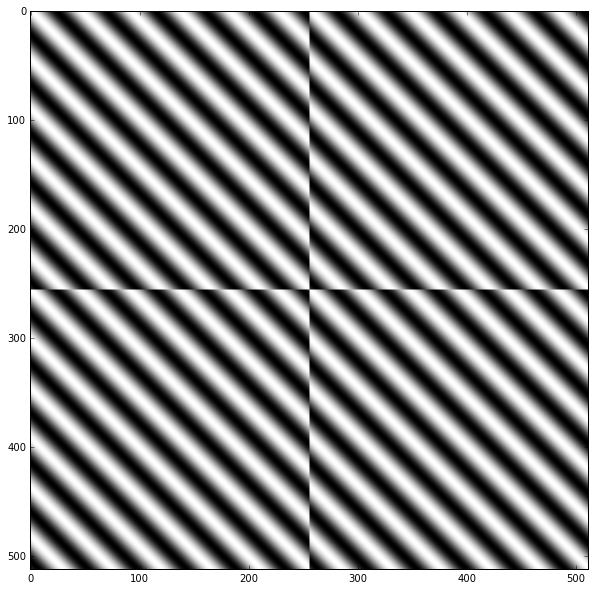

In [20]:
figure(figsize(10, 10))
plt.imshow(img, 'gray');

### Windowing

In [21]:
w = np.hanning(int(N/2))

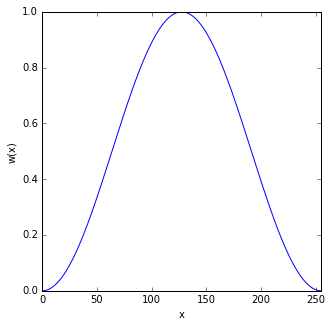

In [22]:
figure(figsize(5, 5))
plt.plot(w)
plt.xlim([0, 255])
plt.xlabel('x')
plt.ylabel('w(x)');

In [23]:
w2D = outer(w, w)

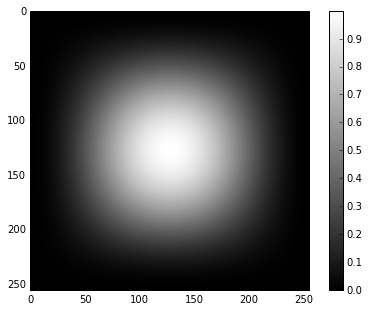

In [24]:
figure(figsize(7, 5))
plt.imshow(w2D, 'gray'), plt.colorbar();

In [25]:
img7 = img6 * w2D
fft7 = np.fft.fftshift(np.fft.fft2(img7))
magnitude_spectrum7 = 20 * np.log(1 + np.abs(fft7))

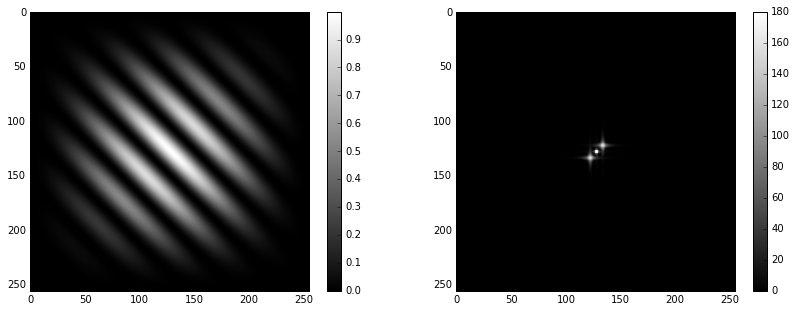

In [26]:
figure(figsize(14, 5))
plt.subplot(1, 2, 1), plt.imshow(img7, 'gray'), plt.colorbar()
plt.subplot(1, 2, 2), plt.imshow(magnitude_spectrum7, 'gray'), plt.colorbar();